### Programming Exercise 1: Linear Regression

 Lets get started! 

First import the libraries that I am going to need:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import math

dataset ex1data1.txt(i manually added population and profit):

In [33]:
"population","profit"
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705

(5.4369, 0.61705)

#### 2.1 Plotting the data

"Before starting on any task, it is often useful to understand the data by
visualizing it."-.pdf. I am a bit skeptic of wheater or not  this is the case but nevertheless let us follow instructions: first without using pandas and then with pandas.



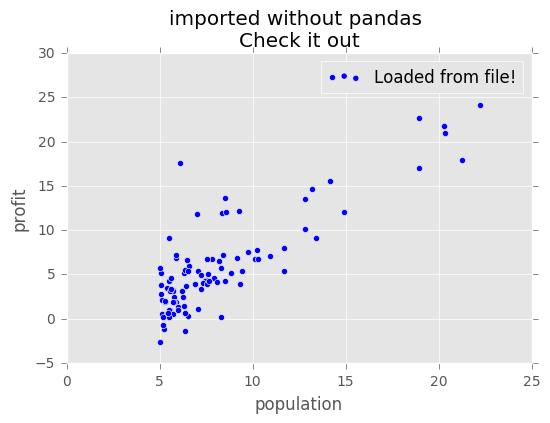

In [34]:
def plot1():

    x=[]
    y=[]
    firstline=True
    with open('ex1data1.txt','r') as csvfile:
       plots=csv.reader(csvfile, delimiter=',')
       for row in plots:
           if firstline:
               firstline=False
               plt.xlabel(row[0])
               plt.ylabel(row[1]) 
               continue 
           x.append(float(row[0]))
           y.append(float(row[1]))

    plt.scatter(x,y, label='Loaded from file!')
    plt.title('imported without pandas \nCheck it out')
    plt.legend()
    plt.show()
    
plot1()    

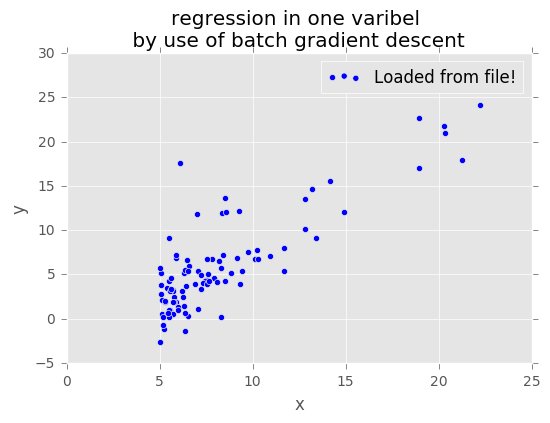

In [35]:
def plot2():
    df=pd.read_csv('ex1data1.txt')

    plt.scatter(df['population'],df['profit'], label='Loaded from file!')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('regression in one varibel \n by use of batch gradient descent ')
    plt.legend()
    plt.show()
plot2()    

I have read that pandas are useful for data analysis so i started this assignment using them. i did not have it clear in my mind on wheather i should convert the dataframes and series to their matrix and vector counterparts that are found in the numpy library, so the assignment got a bit messy. The rule of thumb that i am going to follow after this assignment is that i'll use pandas for simple data manipulation and visualization, and numpy for whenever i'm going to use operations that are associated with linear algebra.

#### 2.2 Gradient Descent

i did this first one in one big funtion (which is bad..) and dataframe as input. just in general not a good function, but it does the job. Suggestion: put import pdb; pdb.set_trace() where you would like to explore what happens and run the code. for instance it can be be put under cost (when it is first mentioned) to verifiy that it is indeed equal to 32.07 when the function is called under the circumstances called for in the pdf.

In [36]:
df=pd.read_csv('ex1data1.txt')
def regression(df, theta0=0, theta1=0, alpha=0.01, iterations=1500):
    x=df.population
    y=df.profit
    m=len(x)
    #luckily x and y behave as vectors, so summing becomes easy
    cost=(1/(2*m))*sum((theta0 +theta1*x-y)**2)
    cost_list=[]
    theta0_list=[]
    theta1_list=[]


    for i in range(0, iterations):
        #updating rule
        theta0=theta0-alpha*sum(theta0+theta1*x-y)/m
        theta1=theta1-alpha*sum((theta0+theta1*x-y)*x)/m
        cost=(1/(2*m))*sum((theta0 +theta1*x-y)**2)
        cost_list.append(cost)
        theta0_list.append(theta0)
        theta1_list.append(theta1)
    return theta0,theta1, range(0, iterations), cost_list, theta0_list, theta1_list

In [37]:
theta0, theta1, iterations_array, cost_list, theta0_list, theta1_list=regression(df)

Some plotting:

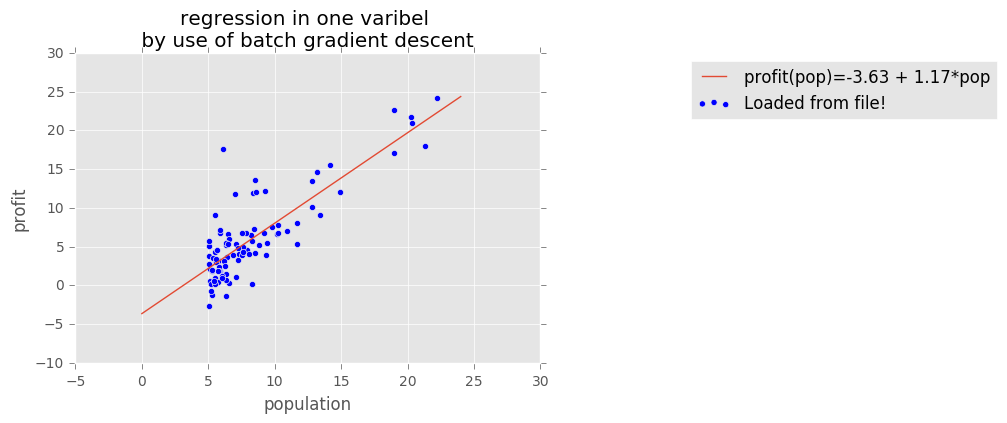

In [38]:
import math
x=range(0, 25)
y=[]
for i in x:
    y.append(theta0+theta1*i)

#similiar code to plot2
plt.scatter(df['population'],df['profit'], label='Loaded from file!')
plt.xlabel('population')
plt.ylabel('profit')
plt.title('regression in one varibel \n by use of batch gradient descent ')

#regression plot
theta0_rounded=math.ceil(theta0*100)/100
theta1_rounded=math.ceil(theta1*100)/100
plt.plot(x,y, label='profit(pop)={theta0} + {theta1}*pop'.format(theta0=theta0_rounded, theta1=theta1_rounded))
plt.legend(bbox_to_anchor=(2, 1))  # location. damn that took time.
plt.show()

#### 2.4 Visualizing J(θ)

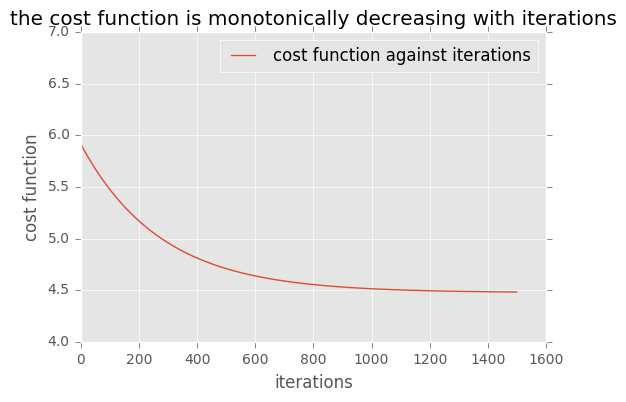

In [39]:
# costfunction against iterations plot
plt.plot(iterations_array, cost_list, label='cost function against iterations')
plt.title("the cost function is monotonically decreasing with iterations")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.legend()
plt.show()

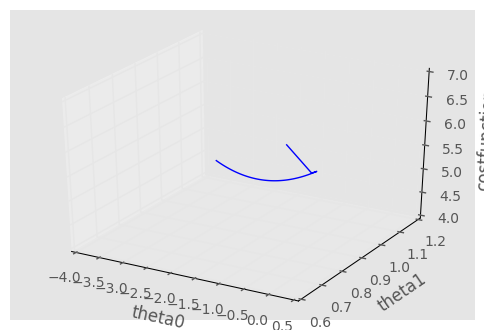

In [40]:
#3d plot (shows tha descent that the algoritm has taken) - does not show the entire surface. this could be done better.

from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

style.use('ggplot')
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_wireframe(theta0_list, theta1_list, cost_list)
ax1.set_xlabel('theta0')
ax1.set_ylabel('theta1')
ax1.set_zlabel('costfunction')

plt.show()

#### 3 Linear regression with multiple variables

In [41]:
df1=pd.read_csv('ex1data2.txt')

#### 3.1 Feature Normalization and 3.2 Gradient Descent

In [42]:

#do i modify df1 here? should i care?
def df_to_matrix(df,Y_name='y', theta_array=None):
    column_names=df.columns.tolist()
    column_names.remove(Y_name)
    X_df=df[column_names]
    X_df['intercept']=1
    X_column_names=['intercept']+ column_names
    X=X_df[X_column_names].as_matrix()

    Y=df[Y_name].as_matrix()

    if theta_array==None:
        theta_array=[]
        for i in range(0,len(X_column_names)):
            theta_array.append(0)

    #the operations on X will become messeed up if i do not use float here. the question remains of wheather i should do the conversion earlier.
    X=X.astype(float)
    Y=Y.astype(float)
    return X, Y, np.array(theta_array)
    


In [43]:
X,Y,theta_array=df_to_matrix(df1,'price')

In [44]:

def feat_normal(X):
    
    #these lists will save the relevant info from the feat_norm and use it to create a new function that will be used for predictions.
    mean_lst=[]
    std_lst=[]
    
    row_length=len(X[0:1][0])
    
    for i in range(0, row_length):
        if not X[:,i].std()==0:
            mean=X[:,i].mean()
            std=X[:,i].std()
            
            mean_lst.append(mean)
            std_lst.append(std)
            
            temp=(X[:,i]-mean)/std
            X[:,i]=temp
            
    def feat_norm_predictor(arg_list):
        #args  must be in the same order as before when this get called!
        
        lst=[]        
        for i in range(0,len(arg_list)):
            modified_arg=(arg_list[i]-mean_lst[i])/std_lst[i]
            lst.append(modified_arg)
        return lst
            
    return X, feat_norm_predictor




In [45]:
X, feat_norm_predict_function=feat_normal(X)

In [46]:
def cost_function_lin_reg(theta_array, X,Y):
    m=len(Y)
    
    cost=sum((np.dot(X,theta_array)-Y)**2)/(m*2)

    return cost


In [47]:
cost_function_lin_reg(theta_array,X,Y)

65591548106.457443

In [48]:
def gradient_descent(theta_array, X, Y,alpha=0.01, treshold=0.01):

        cost=cost_function_lin_reg(theta_array,X,Y)
        gradient=gradient_function(theta_array,X,Y)
        counter=0
        cost_old=treshold+1
        cost_list=[]
        while abs(cost-cost_old)>treshold and counter <10000:
        
            counter=counter+1
            cost_list.append(cost)
            cost_old=cost
            

            gradient=gradient_function(theta_array,X,Y)
            
            for i in range(0, len(gradient)):
                theta_array[i]=theta_array[i]-alpha*gradient[i]
            cost=cost_function_lin_reg(theta_array, X, Y)
        print('it took {counter} iterations'.format(counter=counter))

        return theta_array, cost, cost_list 


In [49]:
theta_array,cost,cost_list=gradient_descent(theta_array, X, Y)

it took 1388 iterations


In [50]:
theta_array

array([340313, 109222,  -6352])

In [51]:
cost

2043307506.9061675

odd sign on the last theta....but maybe that is due to the feature normalization. will find out later but can import an black box optimizer(that i use later for the case when im doing log_reg) to double check.

In [22]:
from scipy import optimize
def optimal_thetas(theta_array,X,Y,iterations=10000):
    result = optimize.fmin(cost_function_lin_reg, x0=theta_array, args=(X, Y), maxiter=iterations, full_output=True)
    print(result[0], result[1])

In [23]:
optimal_thetas(theta_array,X,Y)

Optimization terminated successfully.
         Current function value: 2043280050.602828
         Iterations: 87
         Function evaluations: 175
[ 340412.66007022  109447.79677572   -6578.35478937] 2043280050.6


good sign! (pun intended ;). I called the relevant functions again in order to call optimal_thetas, and then again to just continue my work. this is not shown in the notebook as that digression would be tedious to document(and of little interest).

In [ ]:
#use this value of θ to predict the price of a house with 1650 square feet and3 bedrooms.

Recall that i defined a function earlier to deal with prediction when the datapoint has not been normalized.

In [52]:
normal_datapoint=feat_norm_predict_function([1650,3])

In [53]:
normal_datapoint

[-0.44604386032761639, -0.2260933675776883]

In [54]:
np.dot(theta_array, np.array([1,normal_datapoint[0],normal_datapoint[1]]))

293031.34255815053

Implementation of normal equation to find analytic solution to linear regression to check if it is not wrong.

In [55]:
from numpy.linalg import inv

def OLS(X,y):
    #restheta = np.zeros((X.shape[1],1))
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y)

In [56]:
theta_array_OLS=OLS(X,Y)

In [57]:
np.dot(theta_array_OLS, np.array([1,normal_datapoint[0],normal_datapoint[1]]))

293081.46433489613

Looks good! to visually show that cost_list is monotonically decreasing is left as an exercise to the reader ;0

In [58]:
cost_list

[65591548106.457443,
 64297890596.941818,
 63031196324.757965,
 61791079228.204399,
 60576679696.015099,
 59387907873.026398,
 58223655937.604576,
 57083896752.228813,
 55967774893.139526,
 54874600242.523521,
 53804408055.740028,
 52756427372.761002,
 51730210108.875771,
 50725155767.514076,
 49740838211.923775,
 48777053538.80793,
 47833343978.326057,
 46909061519.662514,
 46003850495.651367,
 45117489398.892975,
 44249278354.344894,
 43399011368.313911,
 42566321642.635063,
 41750928496.12352,
 40952286893.219231,
 40170130397.305885,
 39404088859.224907,
 38653752192.705734,
 37918767139.690758,
 37198891418.441078,
 36493885376.885391,
 35803262692.460426,
 35127043255.589622,
 34464436696.507088,
 33815516823.488293,
 33180022263.765224,
 32557544860.003517,
 31947835541.482262,
 31350436493.318359,
 30765385891.405788,
 30192259270.589901,
 29630784656.46891,
 29080863290.131008,
 28542090517.714558,
 28014429721.348915,
 27497507059.913799,
 26991135374.643063,
 26494995829.400